In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
plt.rcParams["figure.figsize"] = (20,10)

In [74]:
# default figure size
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [75]:
sns.set_theme()

In [76]:
%matplotlib inline


In [77]:
train = pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Training.csv")
test = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Testing.csv')

In [78]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [79]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [80]:
# droping a useless column named 'Unnamed column'
train.drop('Unnamed: 133',axis =1 , inplace = True)

In [81]:
 train.shape

(4920, 133)

In [82]:
test.shape

(42, 133)

In [83]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [84]:
train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [85]:
train['prognosis'].value_counts().count()

41

In [86]:
train.isna().sum()
#no null values / missing data -- train set

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [87]:
test.isna().sum()
# no null values/missing data -- test set

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [88]:
symptom_count = train.apply(lambda x : True
            if x['itching'] == 1 else False, axis = 1)
  
# Count number of True in the series
num_rows = len(symptom_count[symptom_count == True].index)


In [89]:
num_rows

678

In [90]:

symtom_dict = {}
for index,column in enumerate(train.columns):
    symtom_dict[column] = index
    





train['prognosis'].replace(
    {}, inplace=True)


In [91]:
train['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

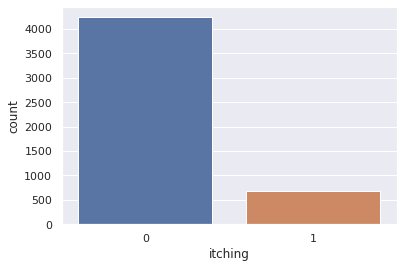

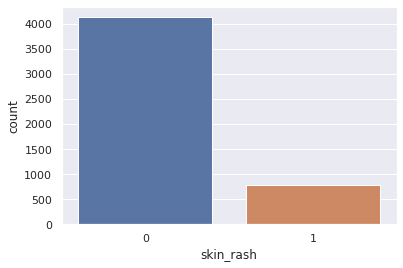

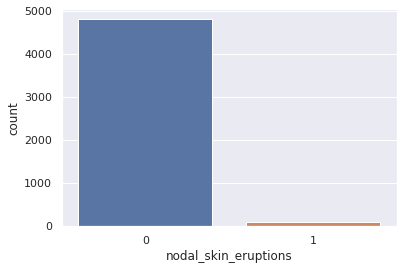

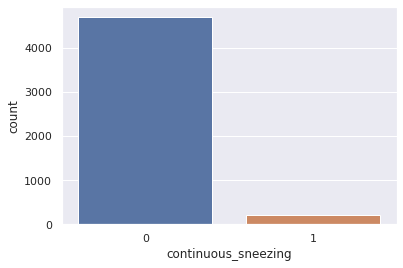

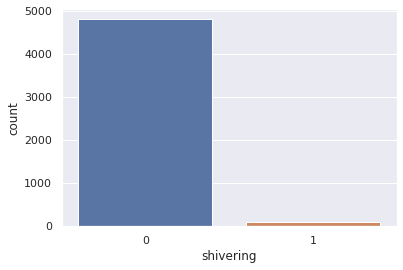

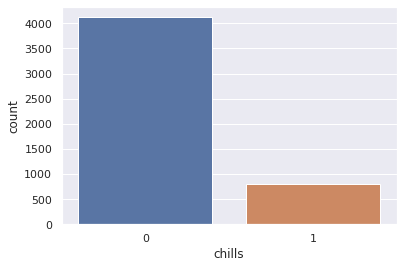

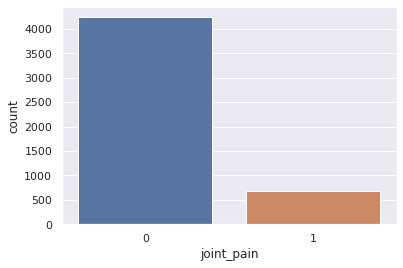

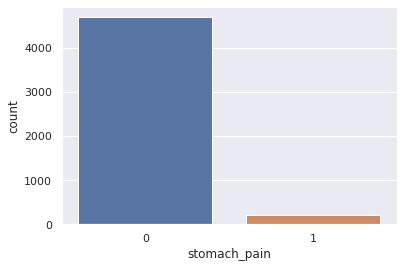

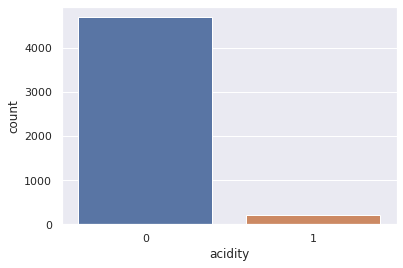

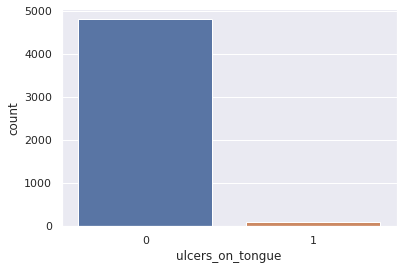

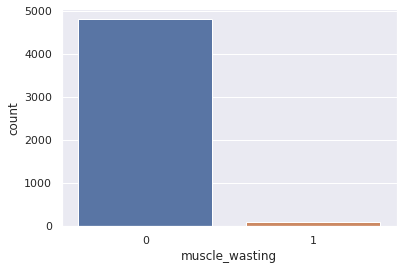

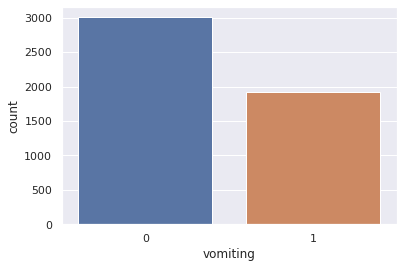

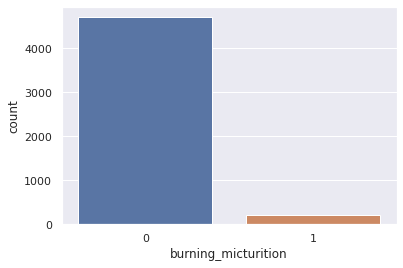

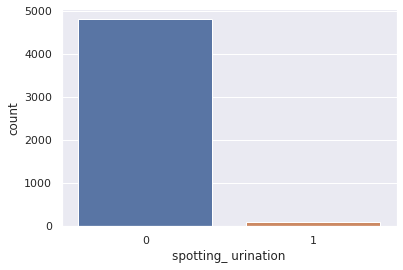

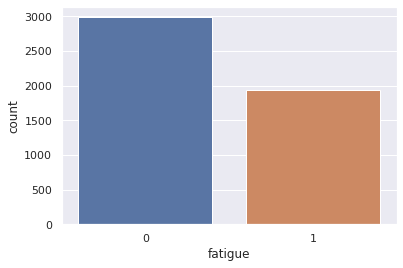

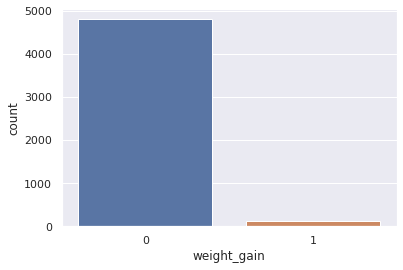

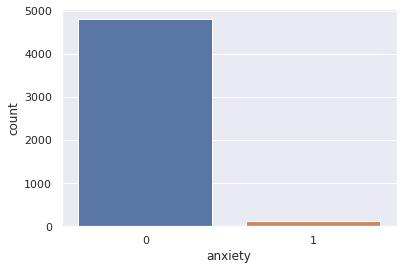

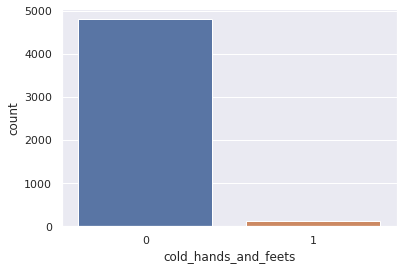

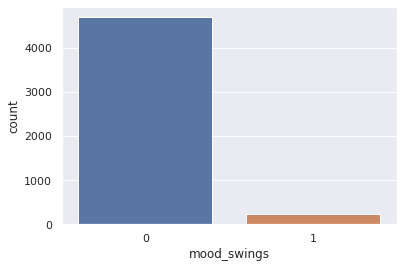

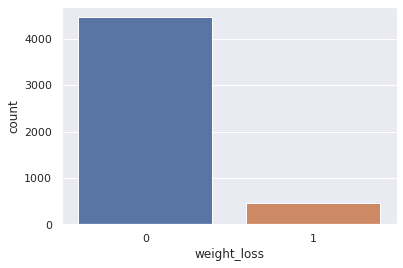

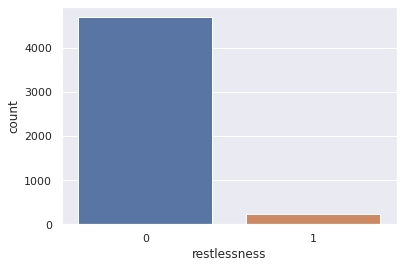

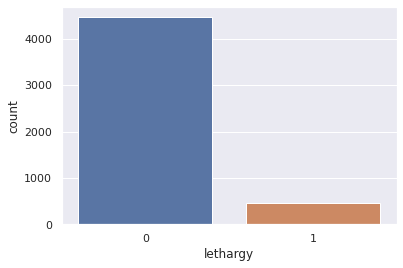

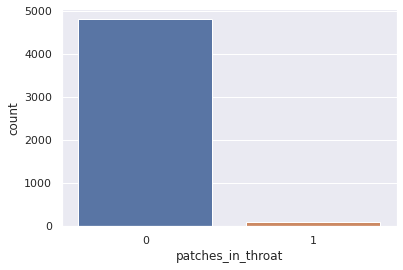

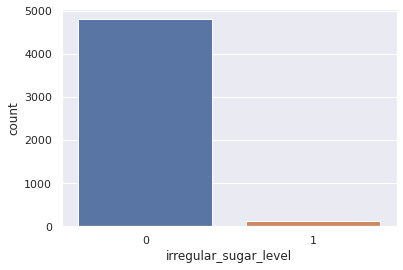

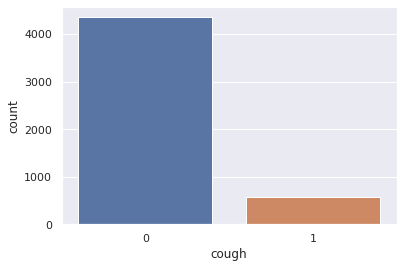

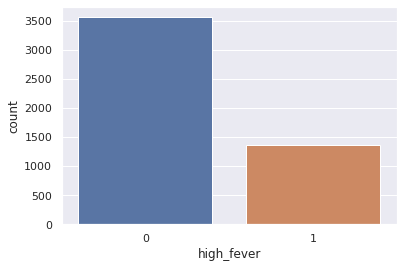

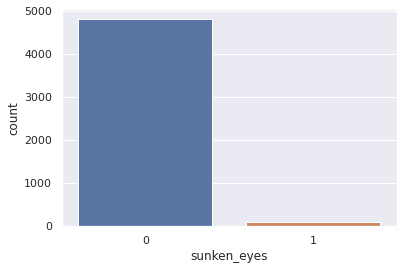

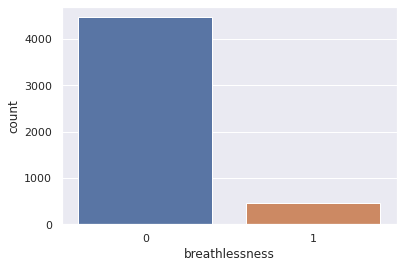

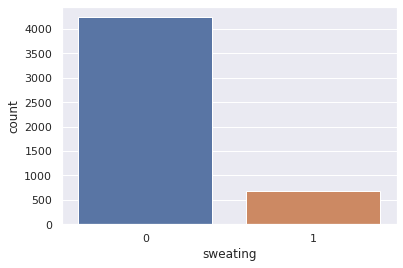

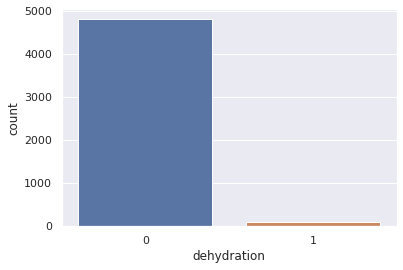

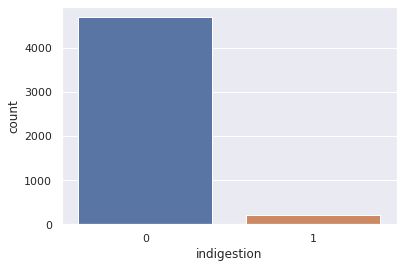

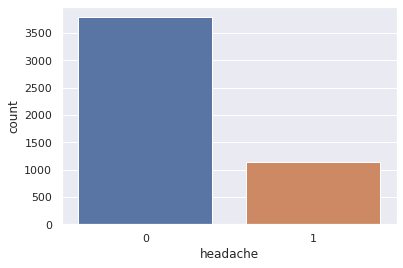

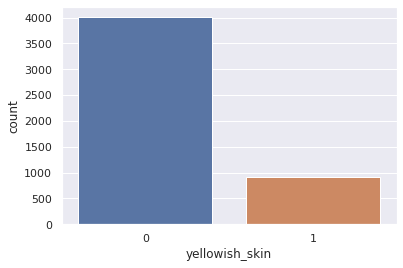

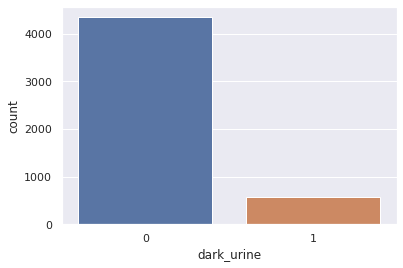

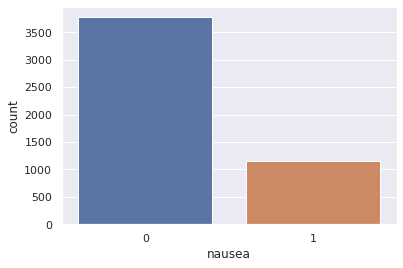

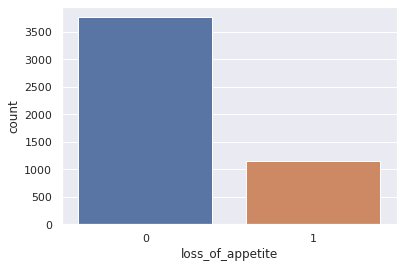

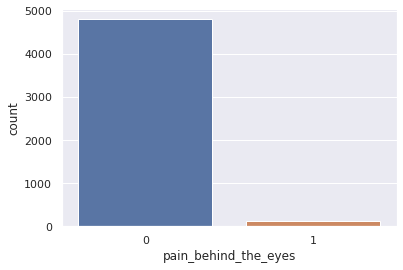

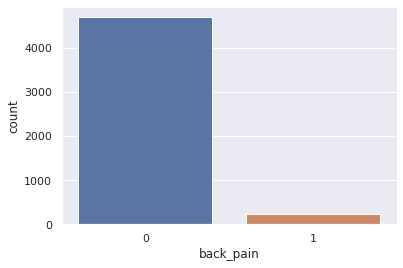

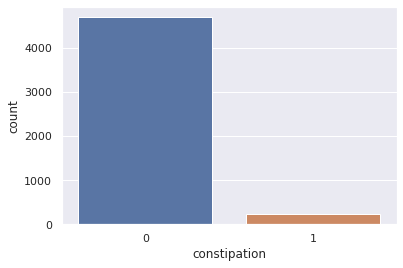

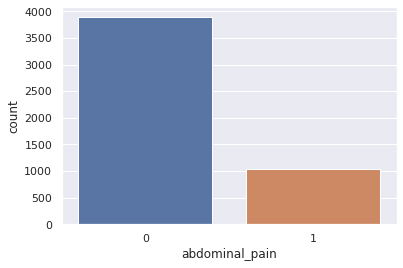

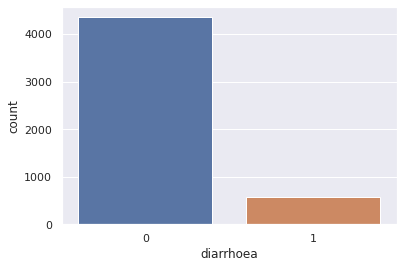

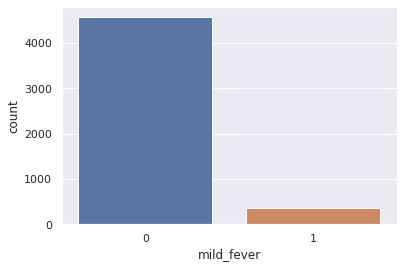

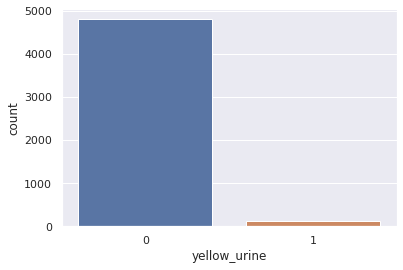

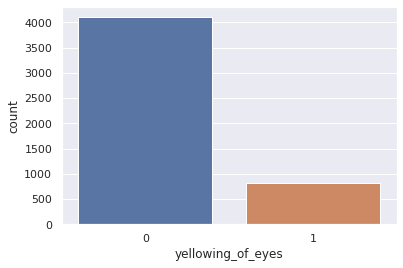

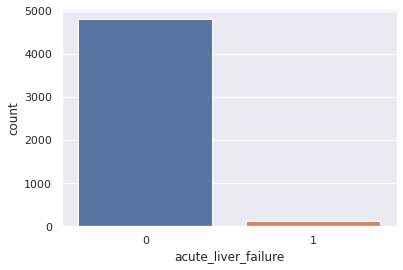

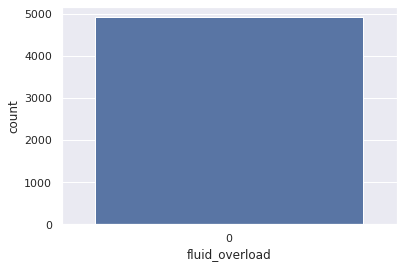

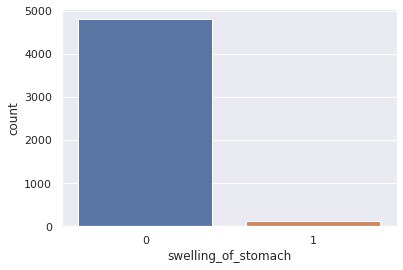

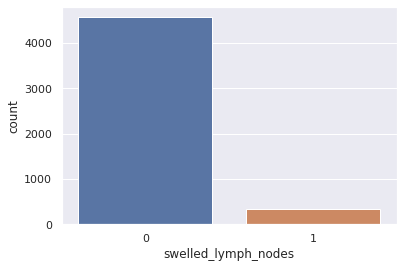

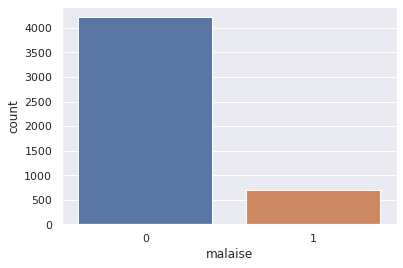

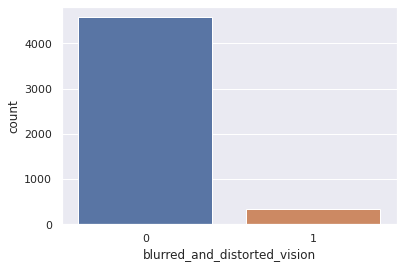

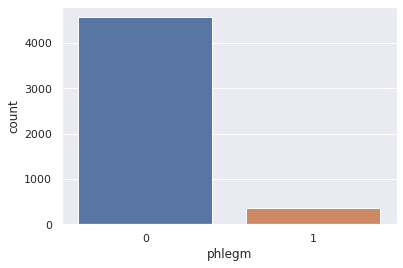

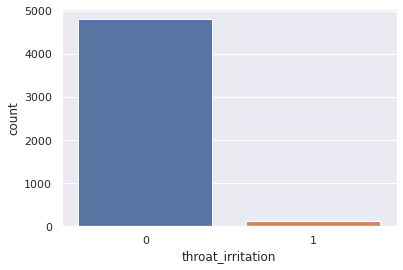

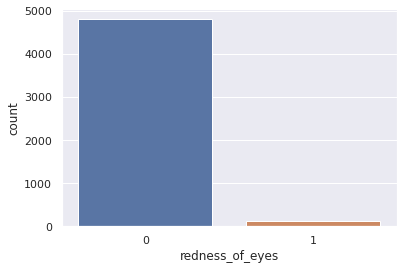

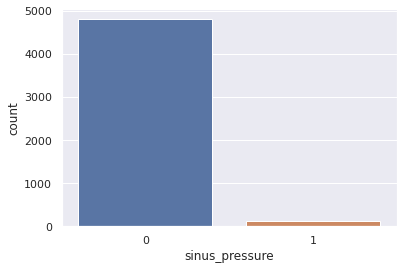

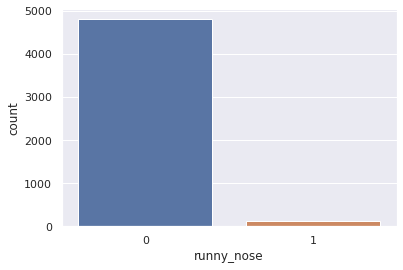

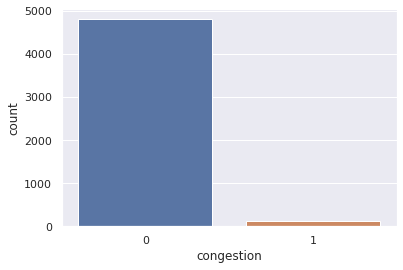

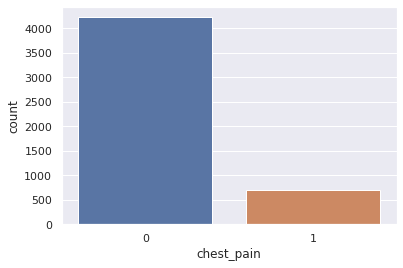

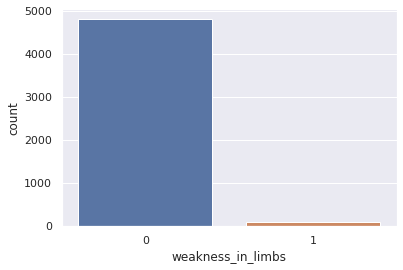

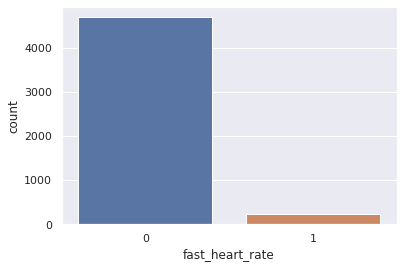

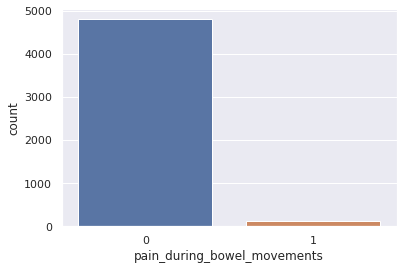

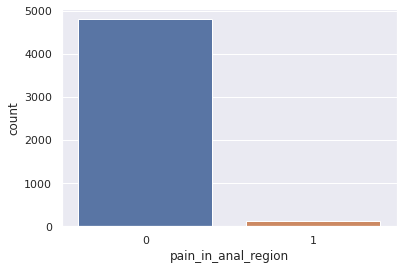

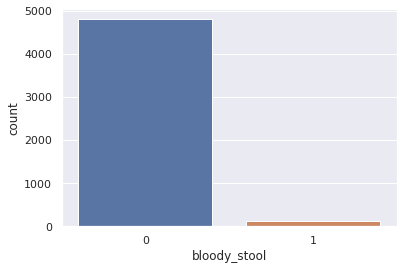

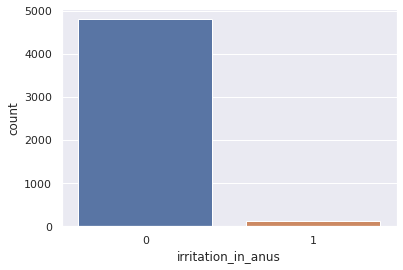

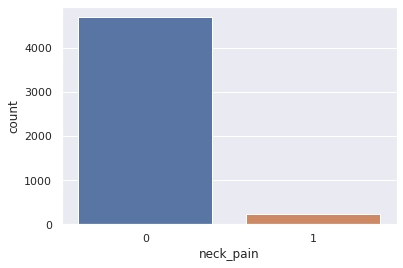

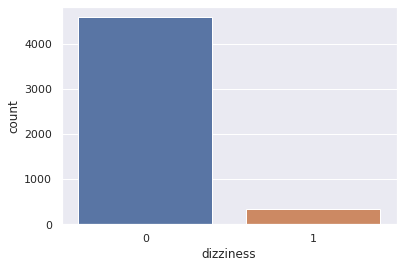

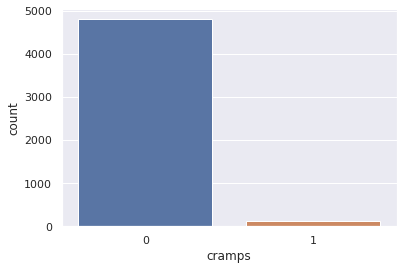

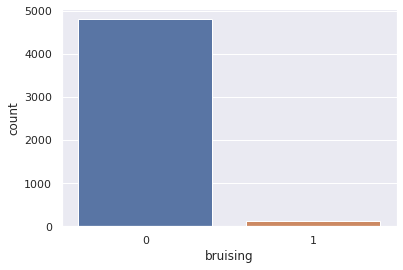

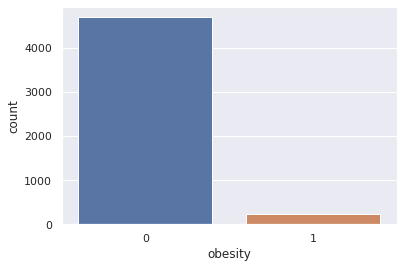

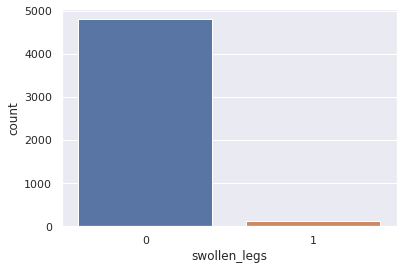

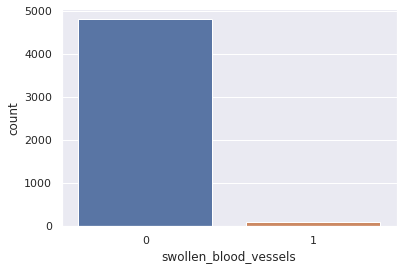

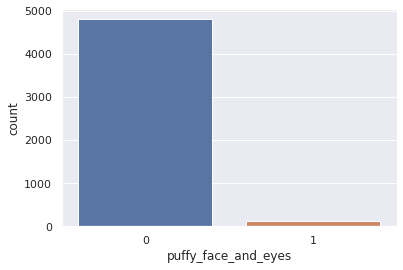

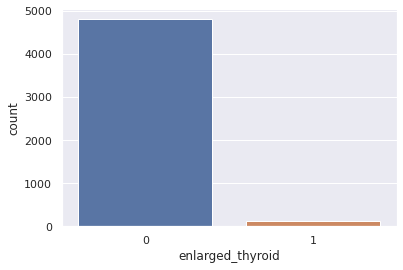

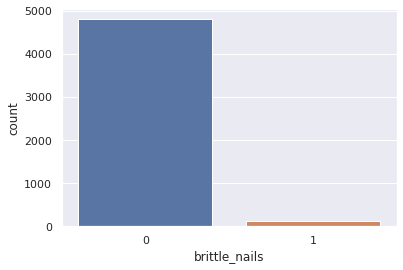

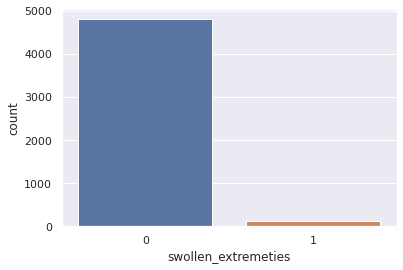

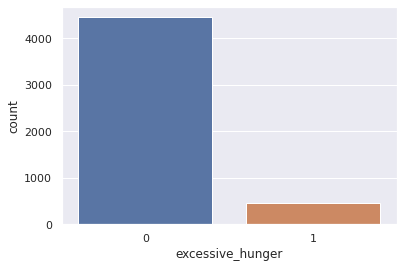

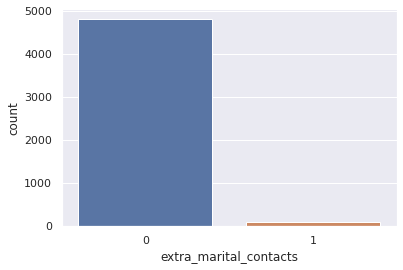

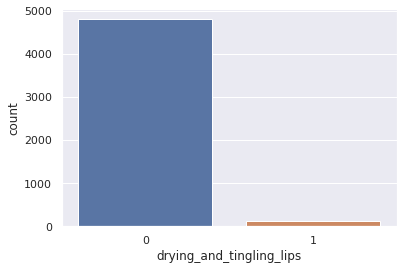

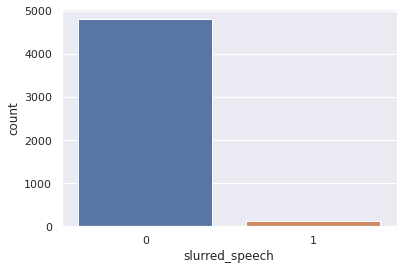

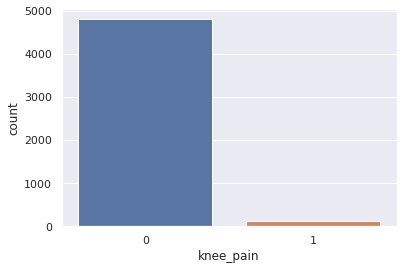

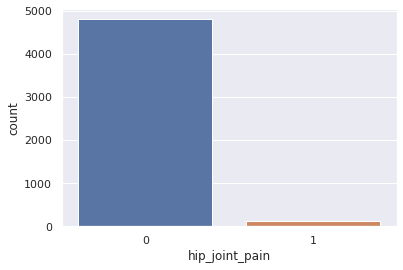

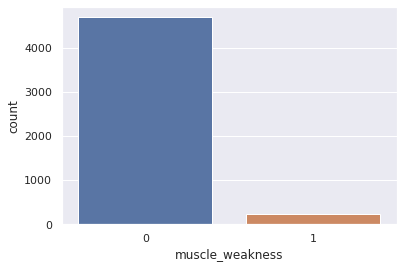

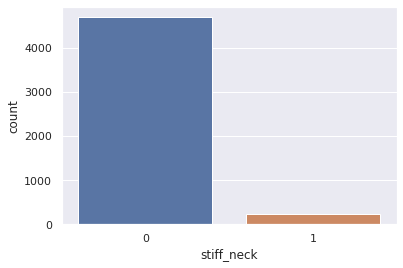

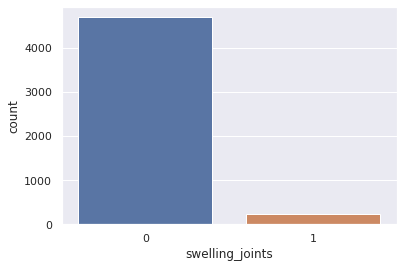

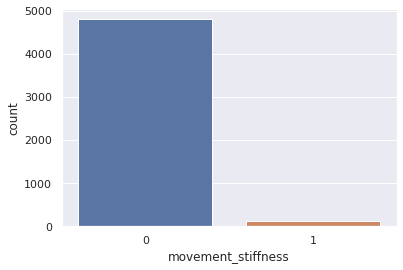

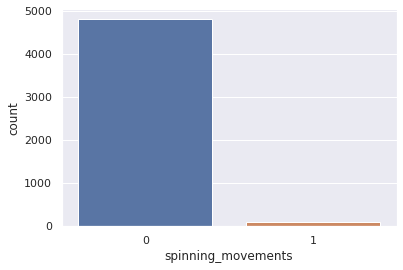

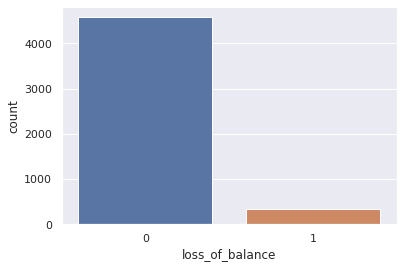

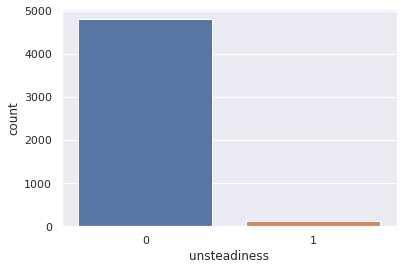

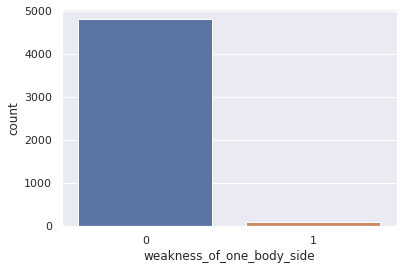

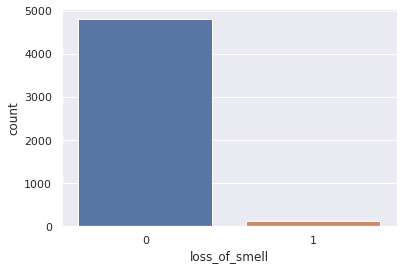

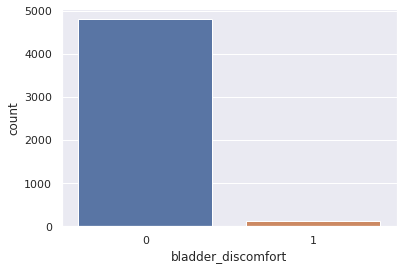

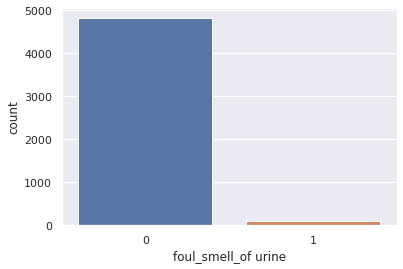

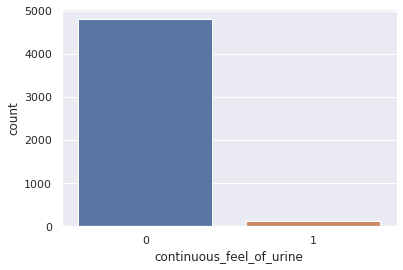

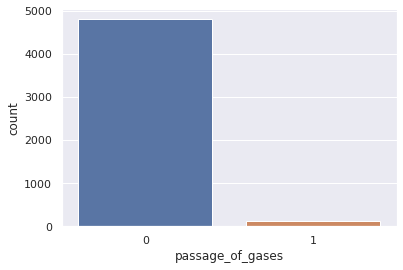

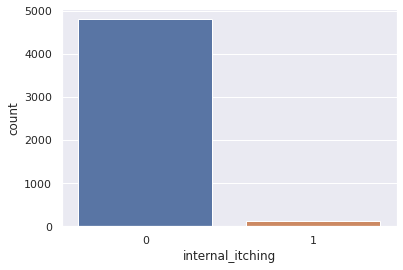

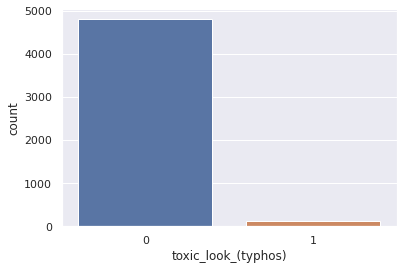

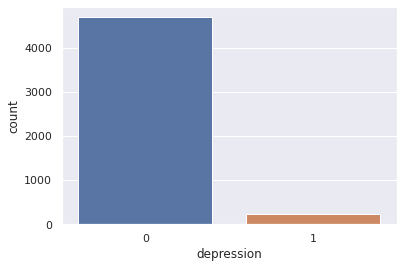

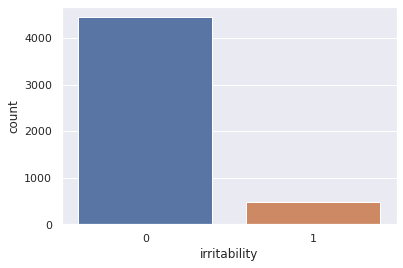

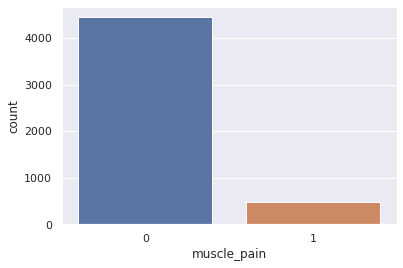

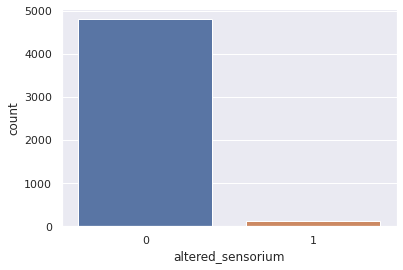

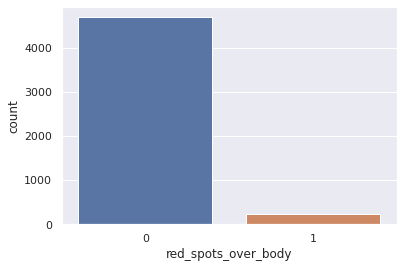

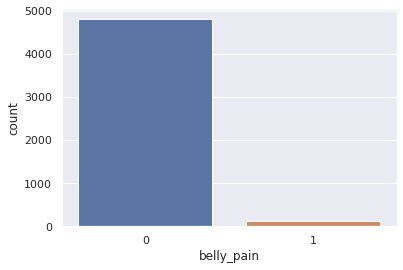

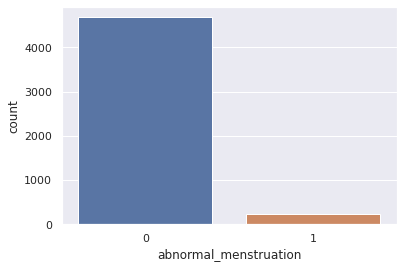

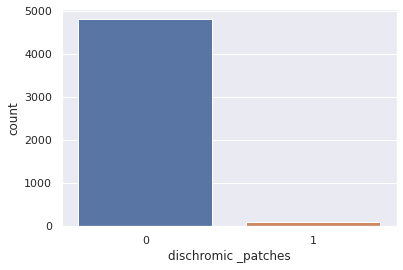

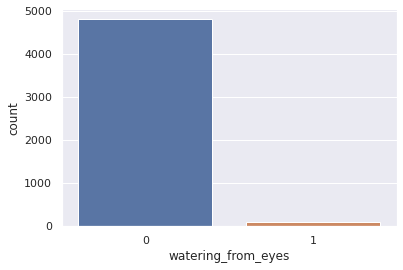

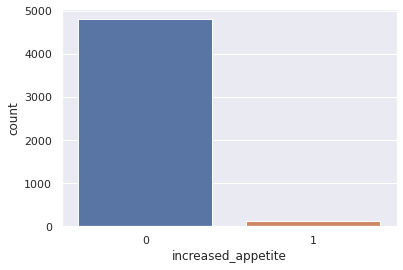

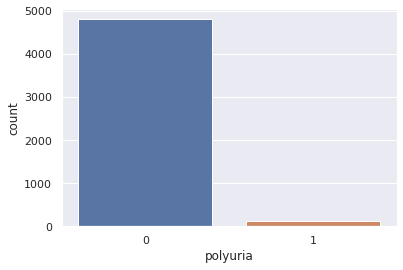

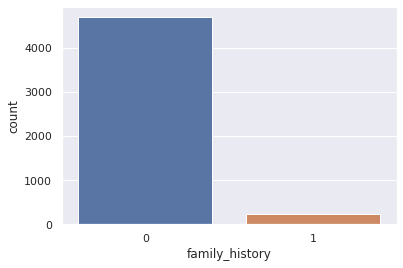

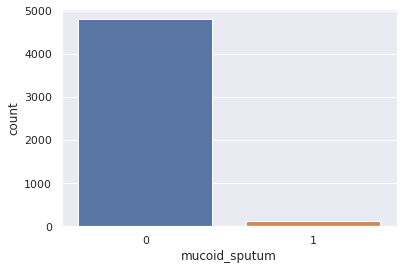

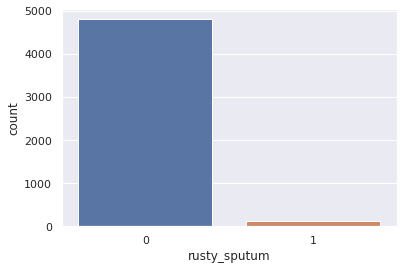

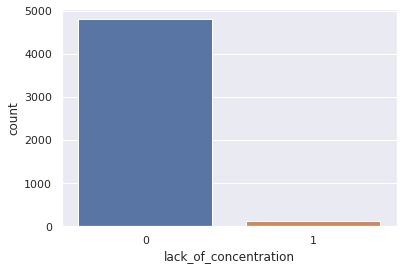

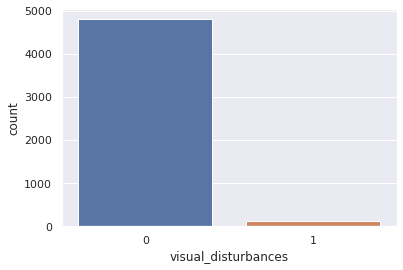

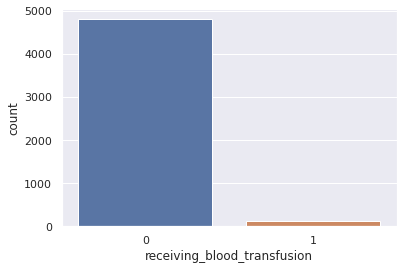

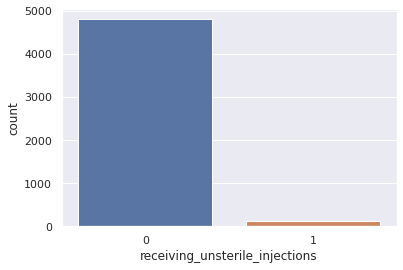

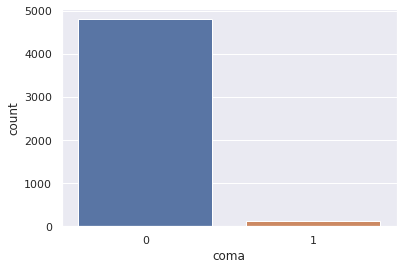

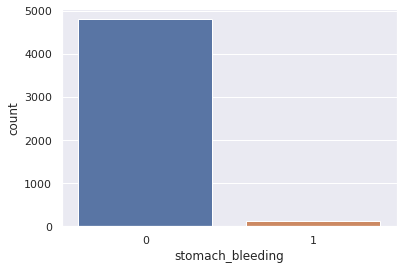

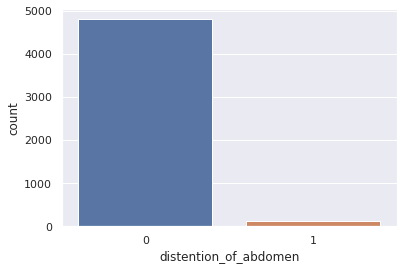

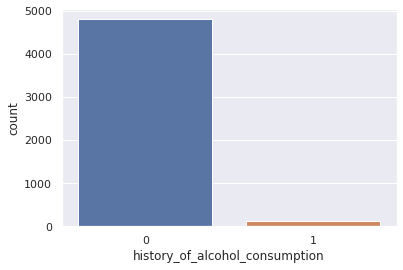

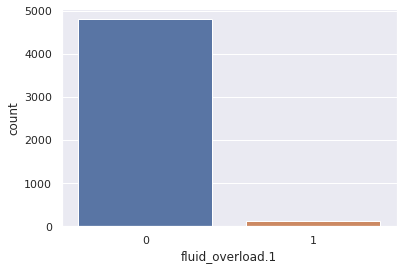

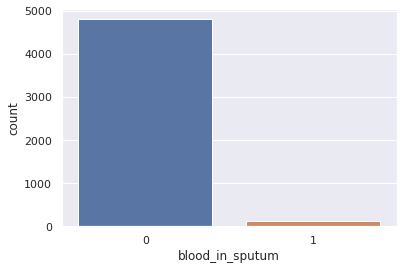

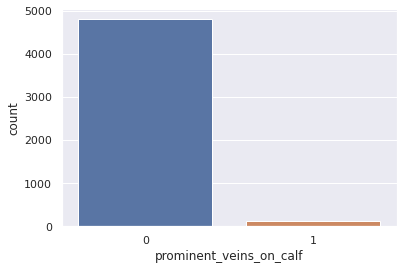

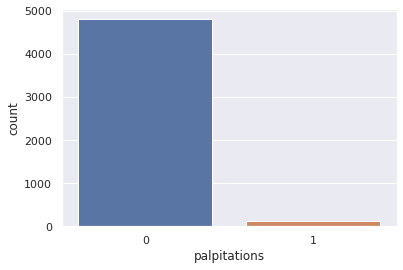

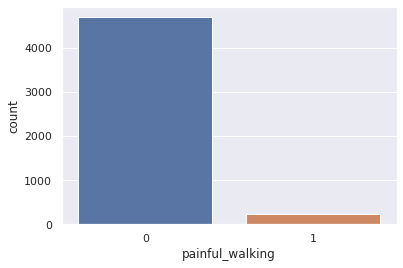

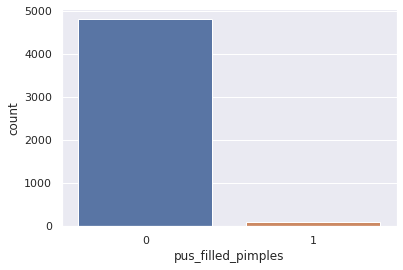

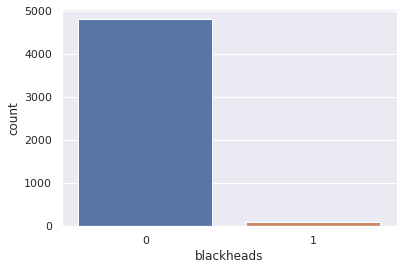

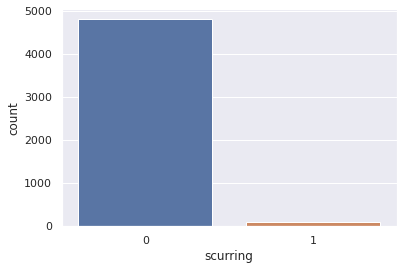

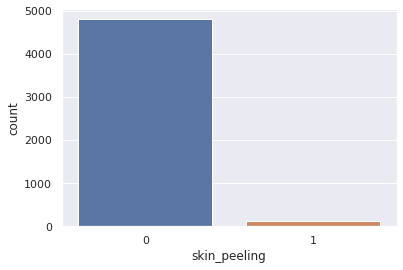

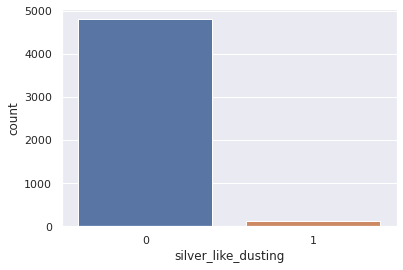

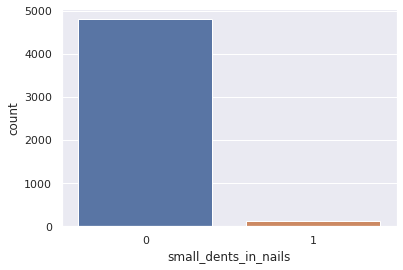

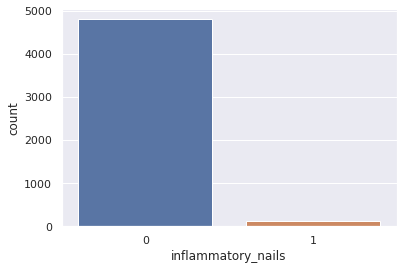

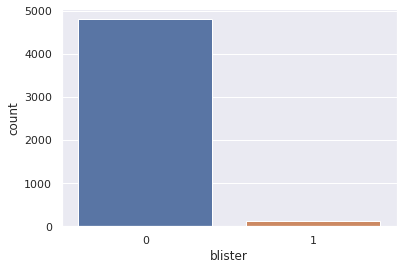

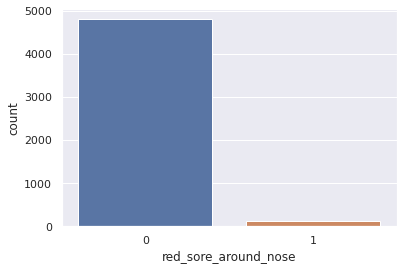

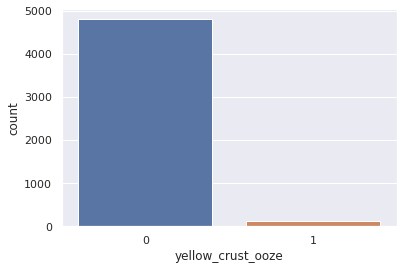

In [92]:
for col in train.columns:
    if col =='prognosis':
        continue
    sns.countplot(data = train , x = col)
    plt.show()



In [93]:
Y = train['prognosis']
X = train.drop('prognosis',axis =1)
y_test = test['prognosis']
X_test = test.drop('prognosis',axis = 1)

# Feature Correlation 

In [94]:
plt.rcParams["figure.figsize"] = (20,10)

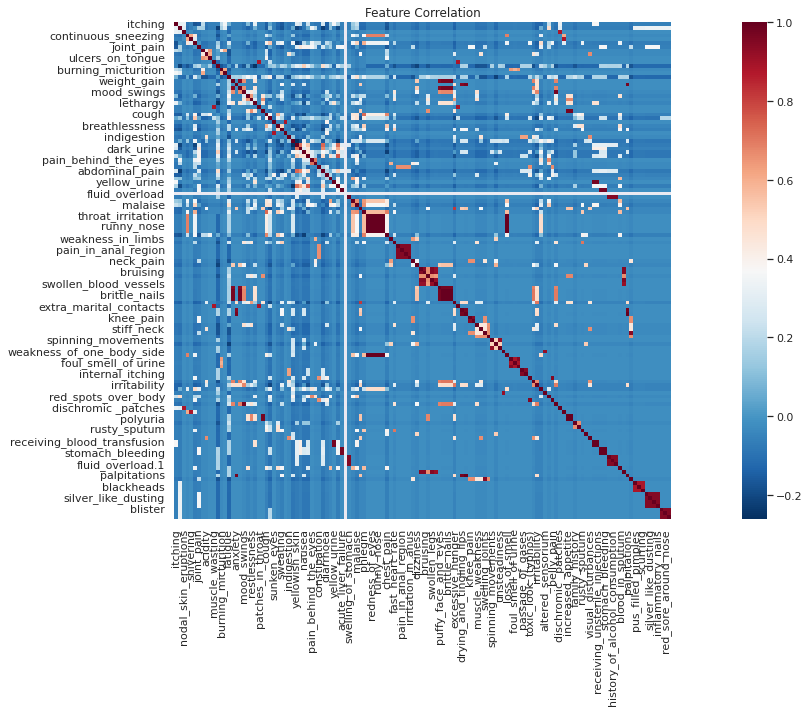

In [95]:
corr = X.corr()
sns.heatmap(corr, square=True, annot=False, cmap="RdBu_r")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

# Train Test Split

In [96]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size = 0.33,random_state = 42)

In [97]:
print(X_train.shape ,Y_train.shape)
print(f"Training set size {X_train.shape[0]}")

(3296, 132) (3296,)
Training set size 3296


In [98]:
print(X_val.shape ,Y_val.shape)
print(f"Validation set size {X_val.shape[0]}")

(1624, 132) (1624,)
Validation set size 1624


In [99]:
print(X_test.shape ,y_test.shape)
print(f"Training set size {X_test.shape[0]}")

(42, 132) (42,)
Training set size 42


### The size of training set : 3296
### The size of validation set : 1624
### the size of testing set : 42

# Initialize the Models

In [100]:
# decision tree
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10,max_features = 'sqrt')
rf = RandomForestClassifier(n_estimators = 10,bootstrap = True,max_depth = 10,
                           )
# gb = GradientBoostingClassifier(n_estimators = 150,criterion = 'friedman_mse',verbose =10
#                             ,n_iter_no_change = 10,tol =0.1,max_features ='log2',
#                                min_samples_leaf = 50,max_depth = 5,ccp_alpha = 0.013)

gb = GradientBoostingClassifier(n_estimators = 150,criterion = 'friedman_mse',verbose =10
                            ,ccp_alpha = 0.005,max_depth = 30,learning_rate = 1.0,
                               n_iter_no_change = 10,tol =0.1)

# Decision Tree

In [101]:
dt = dt.fit(X_train,Y_train)
print(dt)
confidence = dt.score(X_val,Y_val)
print(f"Training Accuracy {confidence}")
Y_pred = dt.predict(X_val)
print(f"Validation Prediction {Y_pred}")
accuracy = accuracy_score(Y_val,Y_pred)
print(f"Validation accuracy {accuracy}")
conf_mat = confusion_matrix(Y_val, Y_pred)
print(f"confusion matrix {conf_mat}")
clf_report = classification_report(Y_val, Y_pred)
print(f"classification report {clf_report}")


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt')
Training Accuracy 0.7352216748768473
Validation Prediction ['Allergy' 'Allergy' 'Hyperthyroidism' ... 'Hepatitis D' 'Heart attack'
 'Arthritis']
Validation accuracy 0.7352216748768473
confusion matrix [[35  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 44]]
classification report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.90      0.95      0.92        37
                                   AIDS       1.00      0.76      0.86        42
                                   Acne       0.00      0.00      0.00        42
                    Alcoholic hepatitis       0.00      0.00      0.00        40
                                Allergy       0.09      1.00      0.16        36
                              Arthritis       1.00     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [102]:
rf = rf.fit(X_train,Y_train)
print(dt)
confidence = rf.score(X_val,Y_val)
print(f"Training Accuracy {confidence}")
Y_pred = rf.predict(X_val)
print(f"Validation Prediction {Y_pred}")
accuracy = accuracy_score(Y_val,Y_pred)
print(f"Validation accuracy {accuracy}")
conf_mat = confusion_matrix(Y_val, Y_pred)
print(f"confusion matrix {conf_mat}")
clf_report = classification_report(Y_val, Y_pred)
print(f"classification report {clf_report}")

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt')
Training Accuracy 0.9236453201970444
Validation Prediction ['Heart attack' 'Heart attack' 'Hyperthyroidism' ... 'Hepatitis D'
 'Hypertension ' 'Arthritis']
Validation accuracy 0.9236453201970444
confusion matrix [[37  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 44]]
classification report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      0.83      0.91        42
                                   Acne       0.00      0.00      0.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      0.89      0.94        36
                              Arthritis     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting

In [103]:
gb = gb.fit(X_train,Y_train)
print(dt)
confidence = gb.score(X_val,Y_val)
print(f"Training Accuracy {confidence}")
Y_pred = gb.predict(X_val)
print(f"Validation Prediction {Y_pred}")
accuracy = accuracy_score(Y_val,Y_pred)
print(f"Validation accuracy {accuracy}")
conf_mat = confusion_matrix(Y_val, Y_pred)
print(f"confusion matrix {conf_mat}")
clf_report = classification_report(Y_val, Y_pred)
print(f"classification report {clf_report}")

      Iter       Train Loss   Remaining Time 
         1           0.1765           36.29s
         2           0.1626            1.40m
         3           0.1596            1.64m
         4           0.1588            1.76m
         5           0.1585            1.83m
         6           0.1584            1.87m
         7           0.1584            1.90m
         8           0.1584            1.91m
         9           0.1584            1.92m
        10           0.1584            1.92m
        11           0.1584            1.93m
DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt')
Training Accuracy 0.9476600985221675
Validation Prediction ['Acne' 'Acne' 'Hyperthyroidism' ... 'Hepatitis D' 'Hypertension '
 'Arthritis']
Validation accuracy 0.9476600985221675
confusion matrix [[35  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 44]]
classification report       

# Cross Validation Score

In [104]:
score = cross_val_score(dt, X_val, Y_val, cv=3)
print(score)

[0.7398524  0.77634011 0.77449168]


In [105]:
score = cross_val_score(rf, X_val, Y_val, cv=3)
print(score)

[0.93726937 0.85212569 0.96118299]


In [106]:
score = cross_val_score(gb, X_val, Y_val, cv=3)
print(score)

      Iter       Train Loss   Remaining Time 
         1           0.1158           12.83s
         2           0.0999           24.04s
         3           0.0920           27.59s
         4           0.0910           29.23s
         5           0.0908           30.09s
         6           0.0908           30.62s
         7           0.0908           30.86s
         8           0.0908           31.01s
         9           0.0907           31.08s
        10           0.0907           31.07s
        11           0.0907           30.96s
      Iter       Train Loss   Remaining Time 
         1           0.1370           12.39s
         2           0.1064           26.83s
         3           0.0952           31.50s
         4           0.0917           33.72s
         5           0.0913           34.78s
         6           0.0911           35.46s
         7           0.0911           35.95s
         8           0.0911           36.18s
         9           0.0910           36.32s
        

In [107]:
# decision tree
result = dt.predict(X_test)
accuracy = accuracy_score(y_test, result)
clf_report = classification_report(y_test, result)
print(f"accuracy {accuracy}")
print(f"clf_report {clf_report}")

accuracy 0.7619047619047619
clf_report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       0.00      0.00      0.00         1
                                Allergy       0.11      1.00      0.20         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.0

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
# random forest
result = rf.predict(X_test)
accuracy = accuracy_score(y_test, result)
clf_report = classification_report(y_test, result)
print(f"accuracy {accuracy}")
print(f"clf_report {clf_report}")

accuracy 0.9285714285714286
clf_report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.0

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
# gradient boosting
result = gb.predict(X_test)
accuracy = accuracy_score(y_test, result)
clf_report = classification_report(y_test, result)
print(f"accuracy {accuracy}")
print(f"clf_report {clf_report}")

accuracy 0.9761904761904762
clf_report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.0

# Comparision between prediction and actual value for all the 3 models

In [110]:
test.join(pd.DataFrame(dt.predict(X_test),columns=["predicted"]))[["prognosis","predicted"]]


,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Allergy
9,Bronchial Asthma,Bronchial Asthma


In [111]:
test.join(pd.DataFrame(rf.predict(X_test),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Heart attack
9,Bronchial Asthma,Bronchial Asthma


In [112]:
test.join(pd.DataFrame(gb.predict(X_test),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [113]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X.columns,  
                                class_names= Y,
                                filled = True
                               )

In [114]:
graph = graphviz.Source(dot_data, format="png")

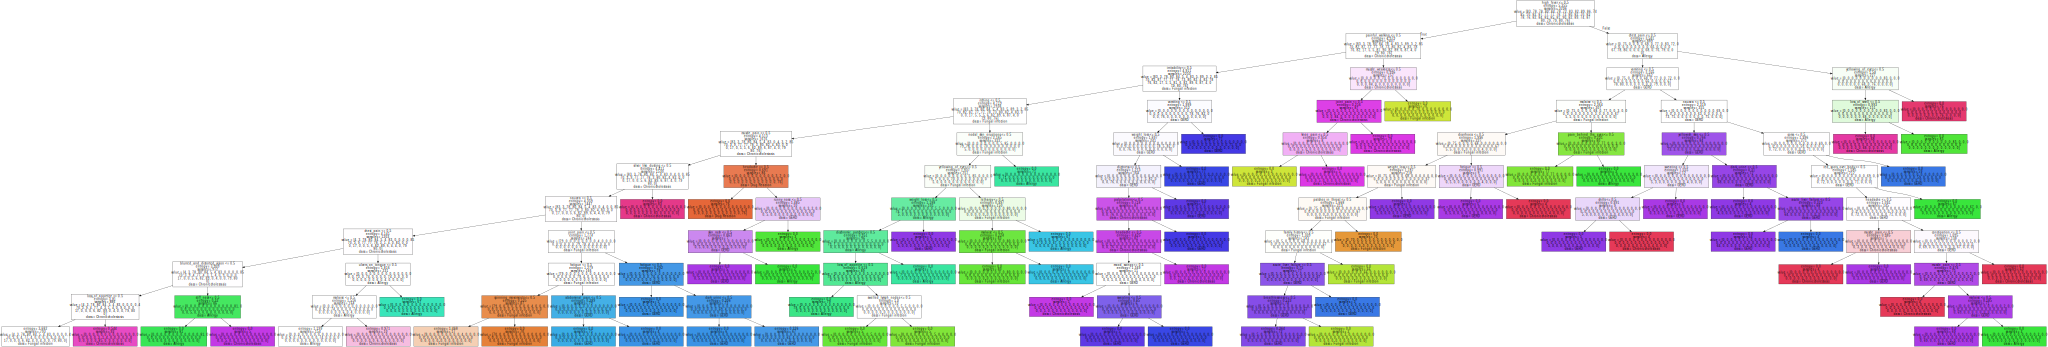

In [115]:
graph

In [116]:
rf.estimators_

[DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1046653179),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=877365211),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1832119693),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=789502423),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=977640629),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=698285780),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=146356913),
 DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=81868239),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=296595639),
 DecisionTreeClassifier(max_depth=10, max_features=

In [117]:

estimator = rf.estimators_[1]
dot_data = tree.export_graphviz(estimator, out_file=None, 
                            feature_names=X.columns,  
                            class_names= Y,
                            filled = True
                            )
graph = graphviz.Source(dot_data, format="png")


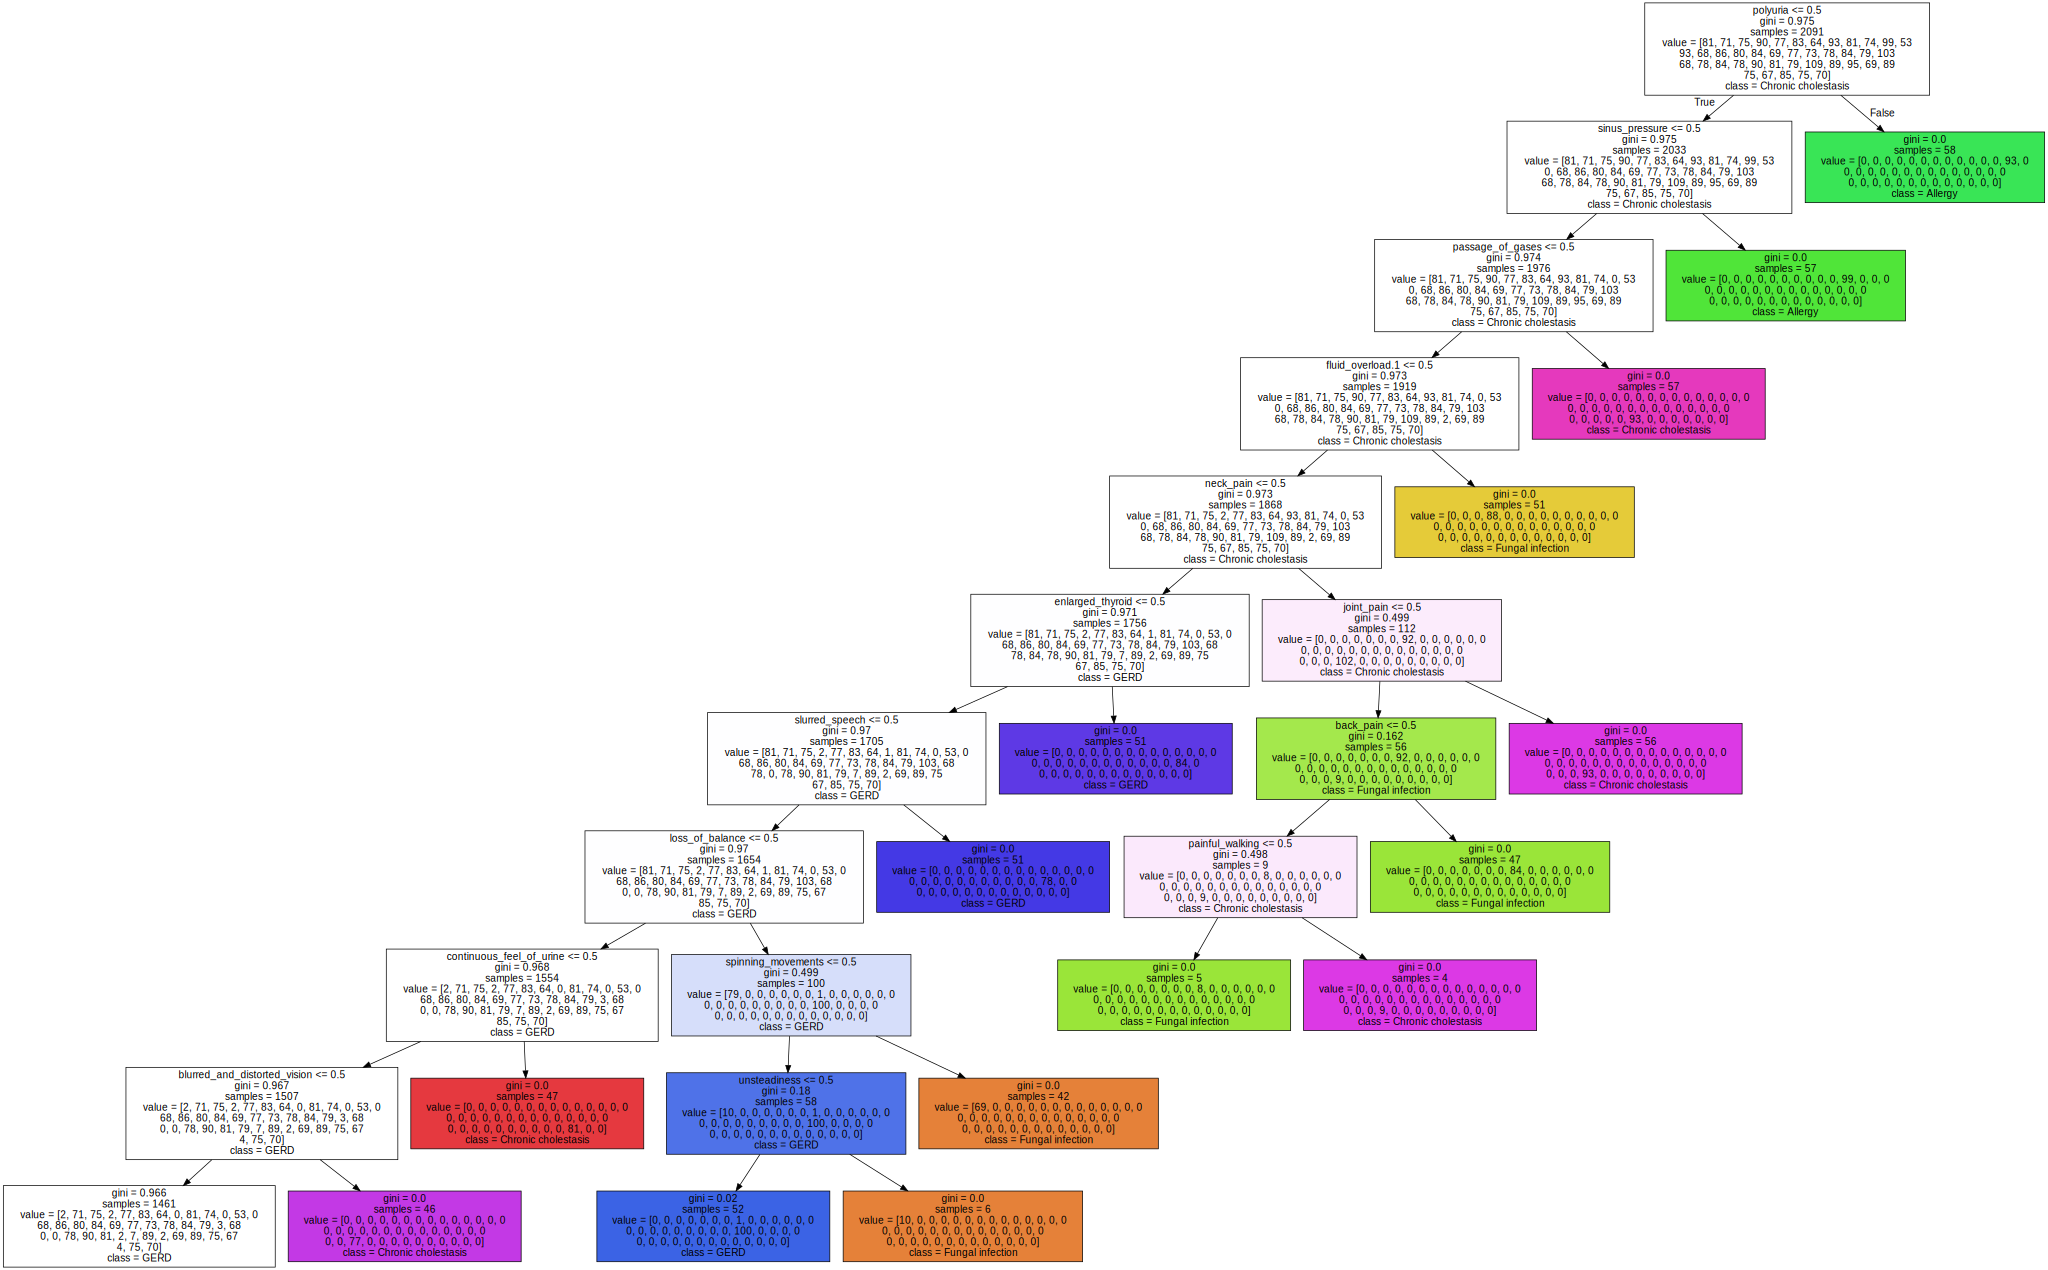

In [118]:
graph